In [12]:
import pandas as pd

# Load the dataset
df = pd.read_csv("student_data.csv")

# Show first 5 rows to understand data structure
df.head()


,Name,Date,Attendance (%),Study Hours,Assignment Score,Test Score,Mood
0,Aayush Verma,2025-05-01,92,3.5,85,78,Happy
1,Riya Singh,2025-05-01,87,2.0,74,65,Neutral
2,Mohit Kumar,2025-05-01,76,1.0,60,58,Stressed
3,Sneha Patil,2025-05-01,95,4.0,90,85,Happy
4,Arjun Mehta,2025-05-01,80,2.5,70,72,Tired


In [13]:
# Check missing values
print("Missing values per column:\n", df.isnull().sum())

# Fill missing numerical values with mean (if any)
num_cols = ['Attendance (%)', 'Study Hours', 'Assignment Score', 'Test Score']
for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# Fill missing categorical values with mode (most common) - for Mood
df['Mood'].fillna(df['Mood'].mode()[0], inplace=True)

# Verify again after filling
print("Missing values after filling:\n", df.isnull().sum())


Missing values per column:
 Name                0
Date                0
Attendance (%)      0
Study Hours         0
Assignment Score    0
Test Score          0
Mood                0
dtype: int64
Missing values after filling:
 Name                0
Date                0
Attendance (%)      0
Study Hours         0
Assignment Score    0
Test Score          0
Mood                0
dtype: int64


C:\Users\chandan kumar\AppData\Local\Temp\ipykernel_19828\1451446987.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\chandan kumar\AppData\Local\Temp\ipykernel_19828\1451446987.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [14]:
# Selecting useful features only
selected_features = ['Attendance (%)', 'Study Hours', 'Assignment Score', 'Test Score', 'Mood']

# Engineering new feature: Total Score (Assignment + Test)
df['Total Score'] = df['Assignment Score'] + df['Test Score']

# Check updated dataframe
df[selected_features + ['Total Score']].head()


,Attendance (%),Study Hours,Assignment Score,Test Score,Mood,Total Score
0,92,3.5,85,78,Happy,163
1,87,2.0,74,65,Neutral,139
2,76,1.0,60,58,Stressed,118
3,95,4.0,90,85,Happy,175
4,80,2.5,70,72,Tired,142


In [15]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates if any
df.drop_duplicates(inplace=True)

# Check data types
print(df.dtypes)

# Convert 'Date' to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Verify changes
print(df.info())


Number of duplicate rows: 0
Name                 object
Date                 object
Attendance (%)        int64
Study Hours         float64
Assignment Score      int64
Test Score            int64
Mood                 object
Total Score           int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Name              5 non-null      object        
 1   Date              5 non-null      datetime64[ns]
 2   Attendance (%)    5 non-null      int64         
 3   Study Hours       5 non-null      float64       
 4   Assignment Score  5 non-null      int64         
 5   Test Score        5 non-null      int64         
 6   Mood              5 non-null      object        
 7   Total Score       5 non-null      int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 452.0+ bytes
None


In [16]:
# Summary statistics for numerical columns
df.describe()


,Date,Attendance (%),Study Hours,Assignment Score,Test Score,Total Score
count,5,5.000000,5.000000,5.00000,5.000000,5.000000
mean,2025-05-01 00:00:00,86.000000,2.600000,75.80000,71.600000,147.400000
min,2025-05-01 00:00:00,76.000000,1.000000,60.00000,58.000000,118.000000
25%,2025-05-01 00:00:00,80.000000,2.000000,70.00000,65.000000,139.000000
50%,2025-05-01 00:00:00,87.000000,2.500000,74.00000,72.000000,142.000000
75%,2025-05-01 00:00:00,92.000000,3.500000,85.00000,78.000000,163.000000
max,2025-05-01 00:00:00,95.000000,4.000000,90.00000,85.000000,175.000000
std,NaN,7.968689,1.193734,11.96662,10.597169,22.187835


In [18]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
corr = numeric_df.corr()
print(corr)

# Identify outliers using IQR for 'Study Hours'
Q1 = df['Study Hours'].quantile(0.25)
Q3 = df['Study Hours'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Study Hours'] < (Q1 - 1.5 * IQR)) | (df['Study Hours'] > (Q3 + 1.5 * IQR))]
print("Outliers in Study Hours:\n", outliers)


                  Attendance (%)  Study Hours  Assignment Score  Test Score  \
Attendance (%)          1.000000     0.893562          0.980513    0.846699   
Study Hours             0.893562     1.000000          0.964301    0.992079   
Assignment Score        0.980513     0.964301          1.000000    0.933663   
Test Score              0.846699     0.992079          0.933663    1.000000   
Total Score             0.933216     0.993908          0.985261    0.981167   

                  Total Score  
Attendance (%)       0.933216  
Study Hours          0.993908  
Assignment Score     0.985261  
Test Score           0.981167  
Total Score          1.000000  
Outliers in Study Hours:
 Empty DataFrame
Columns: [Name, Date, Attendance (%), Study Hours, Assignment Score, Test Score, Mood, Total Score]
Index: []


In [19]:
# Handling outliers by capping them to boundary values (Winsorizing)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['Study Hours'] = df['Study Hours'].apply(lambda x: lower_bound if x < lower_bound else x)
df['Study Hours'] = df['Study Hours'].apply(lambda x: upper_bound if x > upper_bound else x)

# Check data after transformation
df['Study Hours'].describe()


count    5.000000
mean     2.600000
std      1.193734
min      1.000000
25%      2.000000
50%      2.500000
75%      3.500000
max      4.000000
Name: Study Hours, dtype: float64

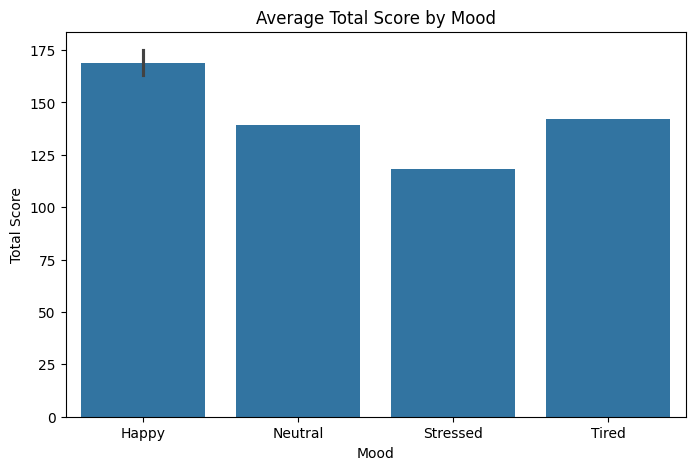

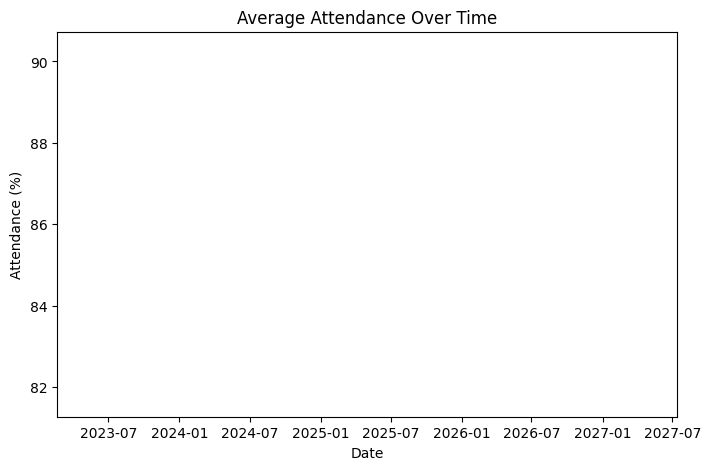

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot of average Total Score by Mood
plt.figure(figsize=(8,5))
sns.barplot(x='Mood', y='Total Score', data=df)
plt.title('Average Total Score by Mood')
plt.show()

# Line plot of Attendance over time (grouped by Date)
attendance_by_date = df.groupby('Date')['Attendance (%)'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.lineplot(x='Date', y='Attendance (%)', data=attendance_by_date)
plt.title('Average Attendance Over Time')
plt.show()
